In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn
from azureml.core import Workspace, Dataset

In [3]:
df = pd.read_csv('Dataset/weather_dataset_raw.csv')

In [4]:
df.head(2)

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,rain
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,rain


In [6]:
df.shape

(96453, 11)

In [7]:
df.dtypes

S_No                        int64
Timestamp                  object
Location                   object
Temperature_C             float64
Apparent_Temperature_C    float64
Humidity                  float64
Wind_speed_kmph           float64
Wind_bearing_degrees        int64
Visibility_km             float64
Pressure_millibars        float64
Weather_conditions         object
dtype: object

In [9]:
# cehck for missing values
df.isnull().sum()

S_No                      0
Timestamp                 0
Location                  0
Temperature_C             0
Apparent_Temperature_C    0
Humidity                  0
Wind_speed_kmph           0
Wind_bearing_degrees      0
Visibility_km             0
Pressure_millibars        0
Weather_conditions        5
dtype: int64

In [10]:
# fill the missing values
df['Weather_conditions'].fillna(method='ffill',inplace=True,axis=0)

In [11]:
df.Weather_conditions.value_counts()

rain     82271
snow     10712
clear     3470
Name: Weather_conditions, dtype: int64

In [12]:
# convert datetime object to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [13]:
#use label encoding to convert 

y = df['Weather_conditions']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

y = pd.DataFrame(data=y, columns=["Current_weather_condition"])


In [14]:
df = pd.concat([df, y], axis=1)
df.Current_weather_condition.value_counts()


1    82271
2    10712
0     3470
Name: Current_weather_condition, dtype: int64

In [15]:
df.drop(['Weather_conditions'],axis=1,inplace=True)

In [16]:
df['Future_weather_condition'] = df.Current_weather_condition.shift(4, axis = 0)

In [17]:
df.dropna(inplace=True)

In [18]:
df['Future_weather_condition'] = df['Future_weather_condition'].apply(np.int64)


In [19]:
df.head(2)

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition,Future_weather_condition
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1,1
5,5,2006-04-01 05:00:00+02:00,"Port of Turku, Finland",9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,1,1


In [20]:
# correlation data

In [21]:
df.corr(method='pearson')

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition,Future_weather_condition
S_No,1.000000,0.025460,0.026591,0.041773,-0.006393,-0.027760,0.109075,0.016650,-0.024573,-0.024723
Temperature_C,0.025460,1.000000,0.992629,-0.632254,0.008959,0.029995,0.392876,-0.005446,-0.583921,-0.555370
Apparent_Temperature_C,0.026591,0.992629,1.000000,-0.602570,-0.056646,0.029039,0.381749,-0.000218,-0.583040,-0.558221
Humidity,0.041773,-0.632254,-0.602570,1.000000,-0.224957,0.000720,-0.369223,0.005451,0.264580,0.232202
Wind_speed_kmph,-0.006393,0.008959,-0.056646,-0.224957,1.000000,0.103815,0.100745,-0.049264,-0.024863,0.001298
Wind_bearing_degrees,-0.027760,0.029995,0.029039,0.000720,0.103815,1.000000,0.047567,-0.011653,-0.014076,-0.015490
Visibility_km,0.109075,0.392876,0.381749,-0.369223,0.100745,0.047567,1.000000,0.059815,-0.303085,-0.297484
Pressure_millibars,0.016650,-0.005446,-0.000218,0.005451,-0.049264,-0.011653,0.059815,1.000000,0.053038,0.054897
Current_weather_condition,-0.024573,-0.583921,-0.583040,0.264580,-0.024863,-0.014076,-0.303085,0.053038,1.000000,0.830375
Future_weather_condition,-0.024723,-0.555370,-0.558221,0.232202,0.001298,-0.015490,-0.297484,0.054897,0.830375,1.000000


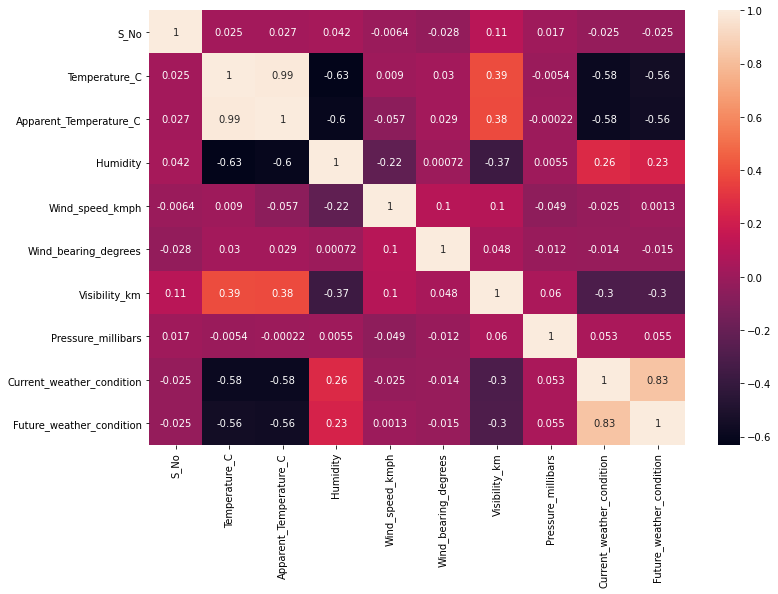

In [23]:
plt.figure(figsize=(12,8))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [24]:
# Filter or drop irrelevent data columns
df.drop(['S_No', 'Apparent_Temperature_C'],axis=1,inplace=True)

<AxesSubplot:>

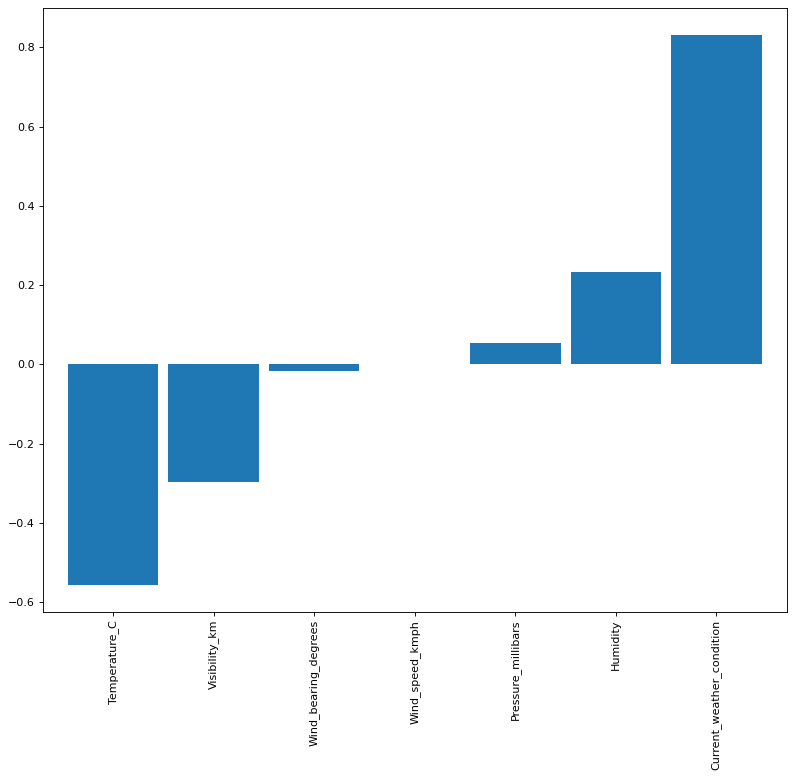

In [25]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='w')
df.corr(method ='pearson')['Future_weather_condition'].sort_values(ascending=True).drop(['Future_weather_condition']).plot(kind='bar', width=0.9)

In [26]:
# using timeseries analysis as temperature is continuos variable
# and it varies with time

time = df['Timestamp']
temp = df['Temperature_C']

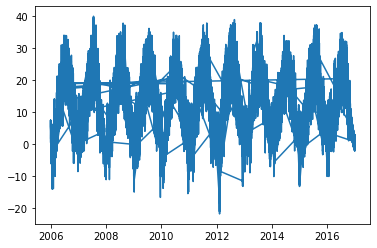

In [27]:
plt.plot(time, temp)
plt.show()

In [28]:
# Save processed dataset 
df.to_csv('Dataset/weather_dataset_processed.csv',index=False)

Register dataset to workspace

In [29]:
subscription_id = 'ID'
resource_group = 'mlonazure'
workspace_name = 'mlonazureWS'

In [31]:
workspace = Workspace(subscription_id, resource_group, workspace_name)
# if prompted with error 
# 1. use service principal
# OR
# 1. open cli and run az login

In [32]:
# get the datastore to upload prepared data
datastore = workspace.get_default_datastore()

In [33]:
# upload the local file from src_dir to the target_path in datastore
datastore.upload(src_dir='Dataset', target_path='data')

Uploading an estimated of 2 files
Uploading Dataset\weather_dataset_raw.csv
Uploaded Dataset\weather_dataset_raw.csv, 1 files out of an estimated total of 2
Uploading Dataset\weather_dataset_processed.csv
Uploaded Dataset\weather_dataset_processed.csv, 2 files out of an estimated total of 2
Uploaded 2 files


$AZUREML_DATAREFERENCE_a25774c7d98a4ee8a23c92dfe3ff3fda

In [35]:
#register the processed data and version it to use it for our ML pipeline

In [34]:
dataset = Dataset.Tabular.from_delimited_files(datastore.path('data/weather_dataset_processed.csv'))

In [36]:
# preview the first 3 rows of the dataset from datastore
dataset.take(3).to_pandas_dataframe()

,Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition,Future_weather_condition
0,2006-04-01 02:00:00,"Port of Turku, Finland",8.755556,0.83,11.0446,259,15.8263,1016.51,1,1
1,2006-04-01 03:00:00,"Port of Turku, Finland",9.222222,0.85,13.9587,258,14.9569,1016.66,1,1
2,2006-04-01 04:00:00,"Port of Turku, Finland",7.733333,0.95,12.3648,259,9.9820,1016.72,1,1


In [37]:
# Using the workspace object, we access the default data store
# and upload the required data files to the data store on Azure Blob Storage connected to the workspace:

In [38]:
weather_ds = dataset.register(workspace=workspace,
                                 name='processed_weather_data',
                                 description='processed weather data')